# Try this

I thought about trying to find some good data for you all to experiment with, but since I am currently interested in my own problem and am trying to write some abstracts, instead you get my data.

Please find two files attached to the Canvas page:
 - "eigen_target.dat" is a 5 column file with 30 rows.
 - "eigen_comparison.dat" is a 5 column file with 132 rows.
 
These files are the results of fitting 162 spectra with eigenvectors generated from the comparison sample.  The first column is the fit coefficients (amplitudes) for the first eigenvector, the second is the fit coefficients for the second eigenvector, and so on.  

It is clear that the distribution of coefficients is different for the target and comparison sample - cumulative histograms and even just a plot (see below) show this to be the case.

It is my feeling that:
 - the target data show a bimodal distribution
 - neither of the "peaks" of the bimodal distribution align particularly well with the peaks of the comparison data, so the target and comparison samples are not drawn from the same parent distribution.
 
Focusing, for the moment, on the coefficients for the first eigenvector (first column) explore the distributions of points for these two files.  Please comment on your results.  In particular, there aren't very many target points (only 30) so it seems probable that some of these methods might do better with fewer points than others.

(To make a nice plot, we'll extract the first two columns below.)

In [2]:

## Initiate python stuff
## Execute twice to make sure it takes effect
%pylab inline
import numpy as np
from scipy import stats

from sklearn.neighbors import KernelDensity

fontsize = 15
figsize = (5,5)
dpi = 125


# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize, 'figure.dpi':dpi})

# Default tick label size
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 2

Populating the interactive namespace from numpy and matplotlib


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(30,)
(132,)


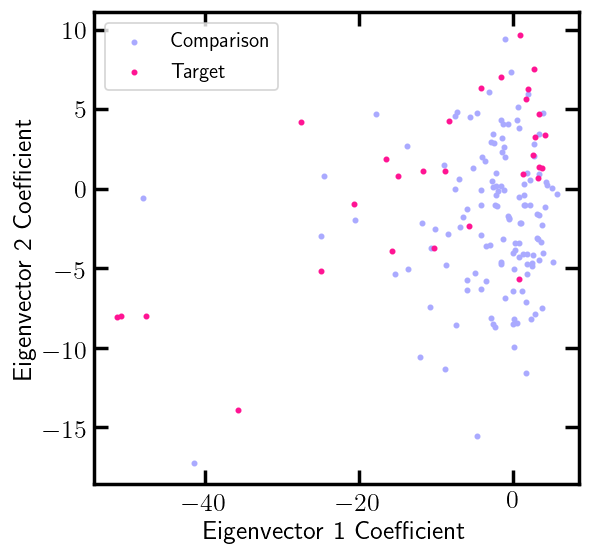

In [3]:
# Read in and plot
r=np.loadtxt('eigen_target.dat')
e1_target=r[:,0]
e2_target=r[:,1]

print (e1_target.shape)
r=np.loadtxt('eigen_comparison.dat')
e1_comparison=r[:,0]
e2_comparison=r[:,1]
print (e1_comparison.shape)

plt.scatter(e1_comparison,e2_comparison, color = '#AAAAFF',label='Comparison', s =6)
plt.scatter(e1_target,e2_target, color = 'deeppink',label='Target', s = 6)

plt.xlabel('Eigenvector 1 Coefficient')
plt.ylabel('Eigenvector 2 Coefficient')

plt.legend(fontsize = 12)

We'll now investigate the behavior of the coefficients for the first Eigenvector. We'll use different kernels to see how the schemes look different. First, a simple histogram:

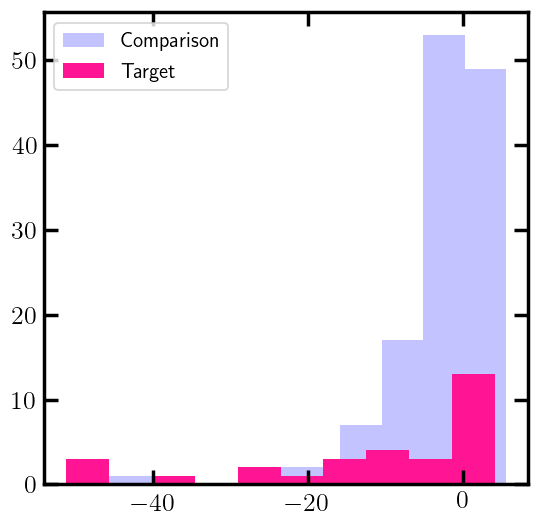

In [4]:

plt.hist(e1_comparison, bins = 10, color = '#AAAAFF', alpha = 0.7, label = 'Comparison')
plt.hist(e1_target, bins = 10, color = 'deeppink', label = 'Target')
plt.legend(fontsize = 12)

Now, set up the kernels. This time around, we'll optimize the bandwidth according to the 'Cross-Validation Score':
$$ CV_l(h)=\frac{1}{N} \sum_{i=1}^N \log f_{h,-i}(x_i).$$

We'll start by running the provided code on the simulate data from lecture:

In [5]:
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
# number of points: 
N = 1000

x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N))
                    for (mu, gamma, f) in mu_gamma_f])
np.random.shuffle(x)
x = x[x > -5]
x = x[x < 25]

xtemp=np.linspace(0,25,1000)


In [6]:
temp=np.linspace(-2,0,21)
print (type(temp))
h_candidates=np.array(10.0**temp)
print (type(h_candidates))
cv=np.zeros([h_candidates.shape[0],xtemp.shape[0]])
print (cv.shape)

numh=h_candidates.shape[0]
print (numh)

for i in range(numh):
    htemp=h_candidates[i]
    kde_skl = KernelDensity(bandwidth = htemp, kernel='gaussian')
    numpnts=xtemp.shape[0]
    for j in range(20,numpnts-20):
        data_one_out=np.concatenate((x[0:j],x[j+1:numpnts]))
        kde_skl.fit(data_one_out[:,np.newaxis])
        log_pdf = kde_skl.score_samples(x[:,np.newaxis])
        cv[i,j]=cv[i,j]+log_pdf[j]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(21, 1000)
21


IndexError: index 966 is out of bounds for axis 0 with size 966

Evidently, this code does not run out of the box as advertised. Instead of preforming the rigorous cross-validation we'll instead just repeat our analysis for a few different band widths:

In [9]:
from sklearn.neighbors import KernelDensity

# Vector
xplot = np.linspace(e1_target.min(),e1_comparison.max(),1000) 

# Function
def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    # create an instance for the particular bandwidth and kernel
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    # apply that to your data
    kde_skl.fit(data[:, np.newaxis])
    # using the result, generate a pdf on your sampling vector xplot.
    log_pdf = kde_skl.score_samples(xplot[:, np.newaxis]) 
    # the program returns the log of the PDF, so take the exponent of that.
    return np.exp(log_pdf)

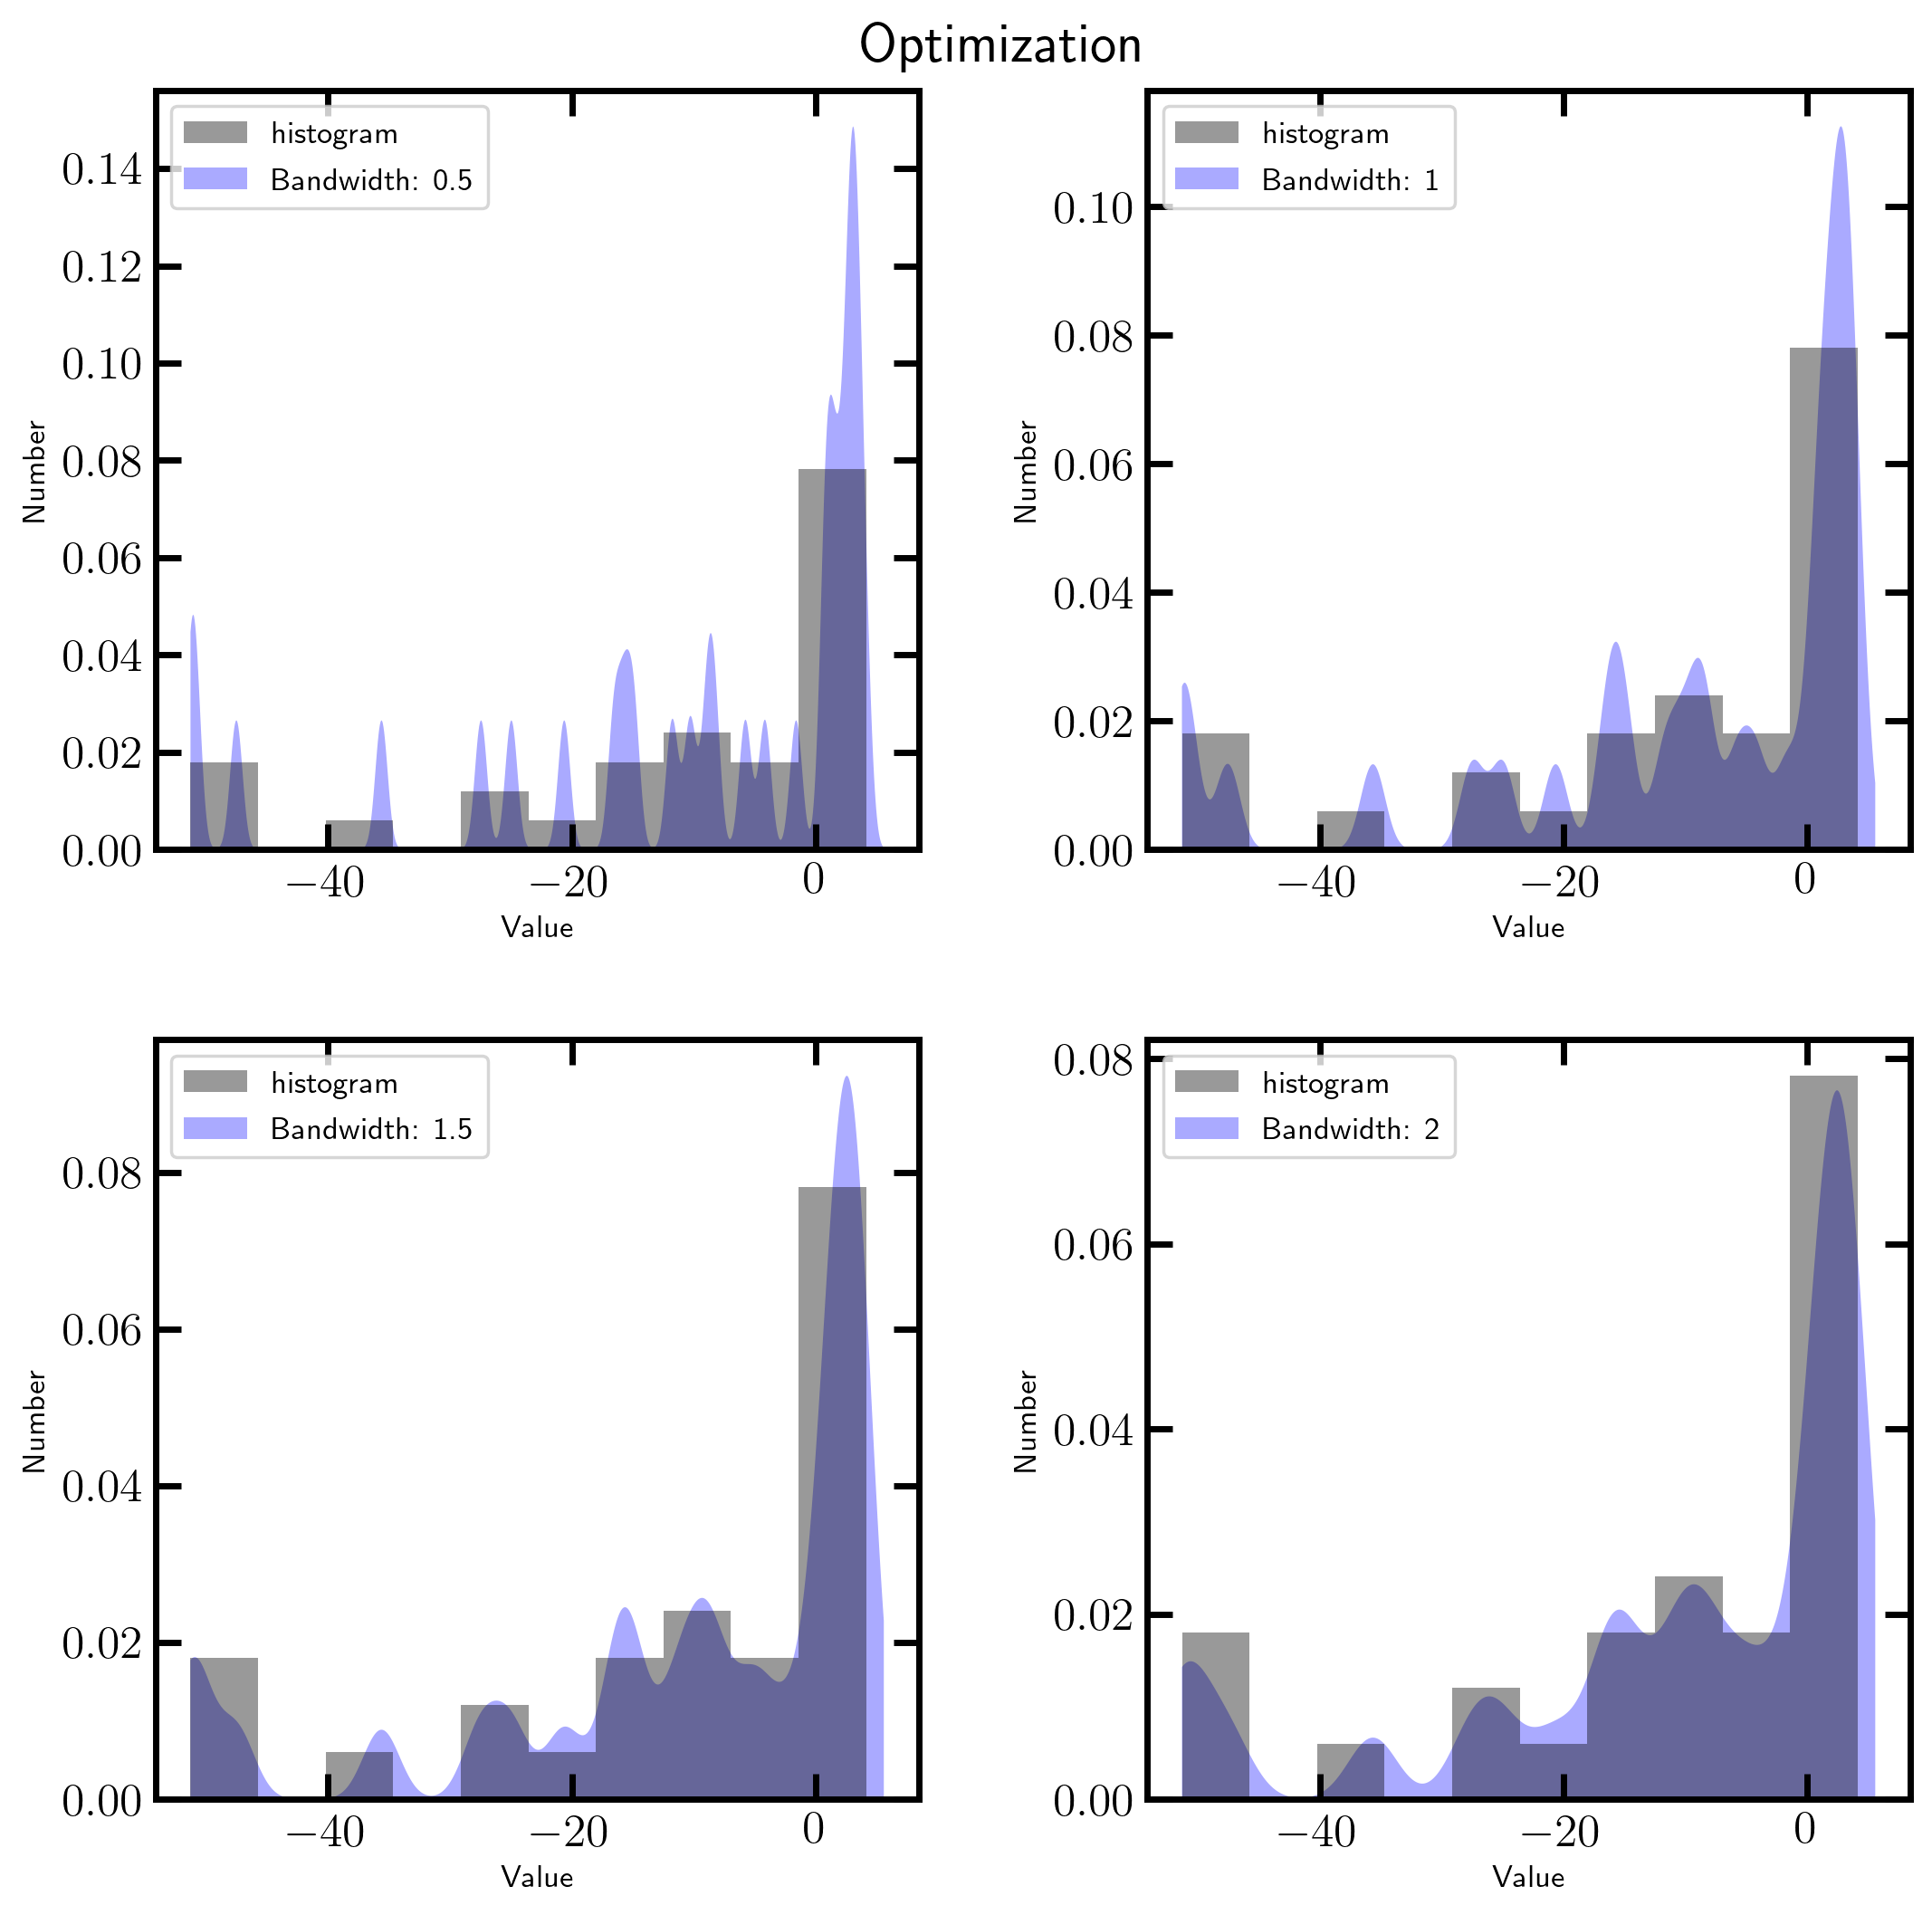

In [15]:
# Inspect a few bandwidths using the Gaussian Kernel

fig, axs = plt.subplots(2,2, facecolor='w', edgecolor='k', dpi = 250,figsize = [10,10])
fig.suptitle("Optimization", x =0.5, y = 0.91)
fig.subplots_adjust(hspace = 0.25, wspace=.3)

axs = axs.ravel()


# List of kernels
bands = [0.5, 1, 1.5, 2]

for i in range(0,len(bands)):
    PDF = kde_sklearn(e1_target,bandwidth=bands[i],kernel= "gaussian")
    
    axs[i].hist(e1_target,bins = 10, histtype = 'stepfilled', color = 'black', alpha = 0.4, label = 'histogram', density = True)
    axs[i].fill_between(xplot, PDF, fc='#AAAAFF', label = "Bandwidth: " + str(bands[i])) 
    axs[i].legend(loc = 'upper left', fontsize = 10)
    axs[i].set_ylabel('Number', fontsize = 10)
    axs[i].set_xlabel('Value', fontsize = 10)


We see that a bandwidth of 2 significantly reduces the random fine structure in the kernels and more closely resembles the data. We'll adopt a bandwidth of 2 from this point forward.

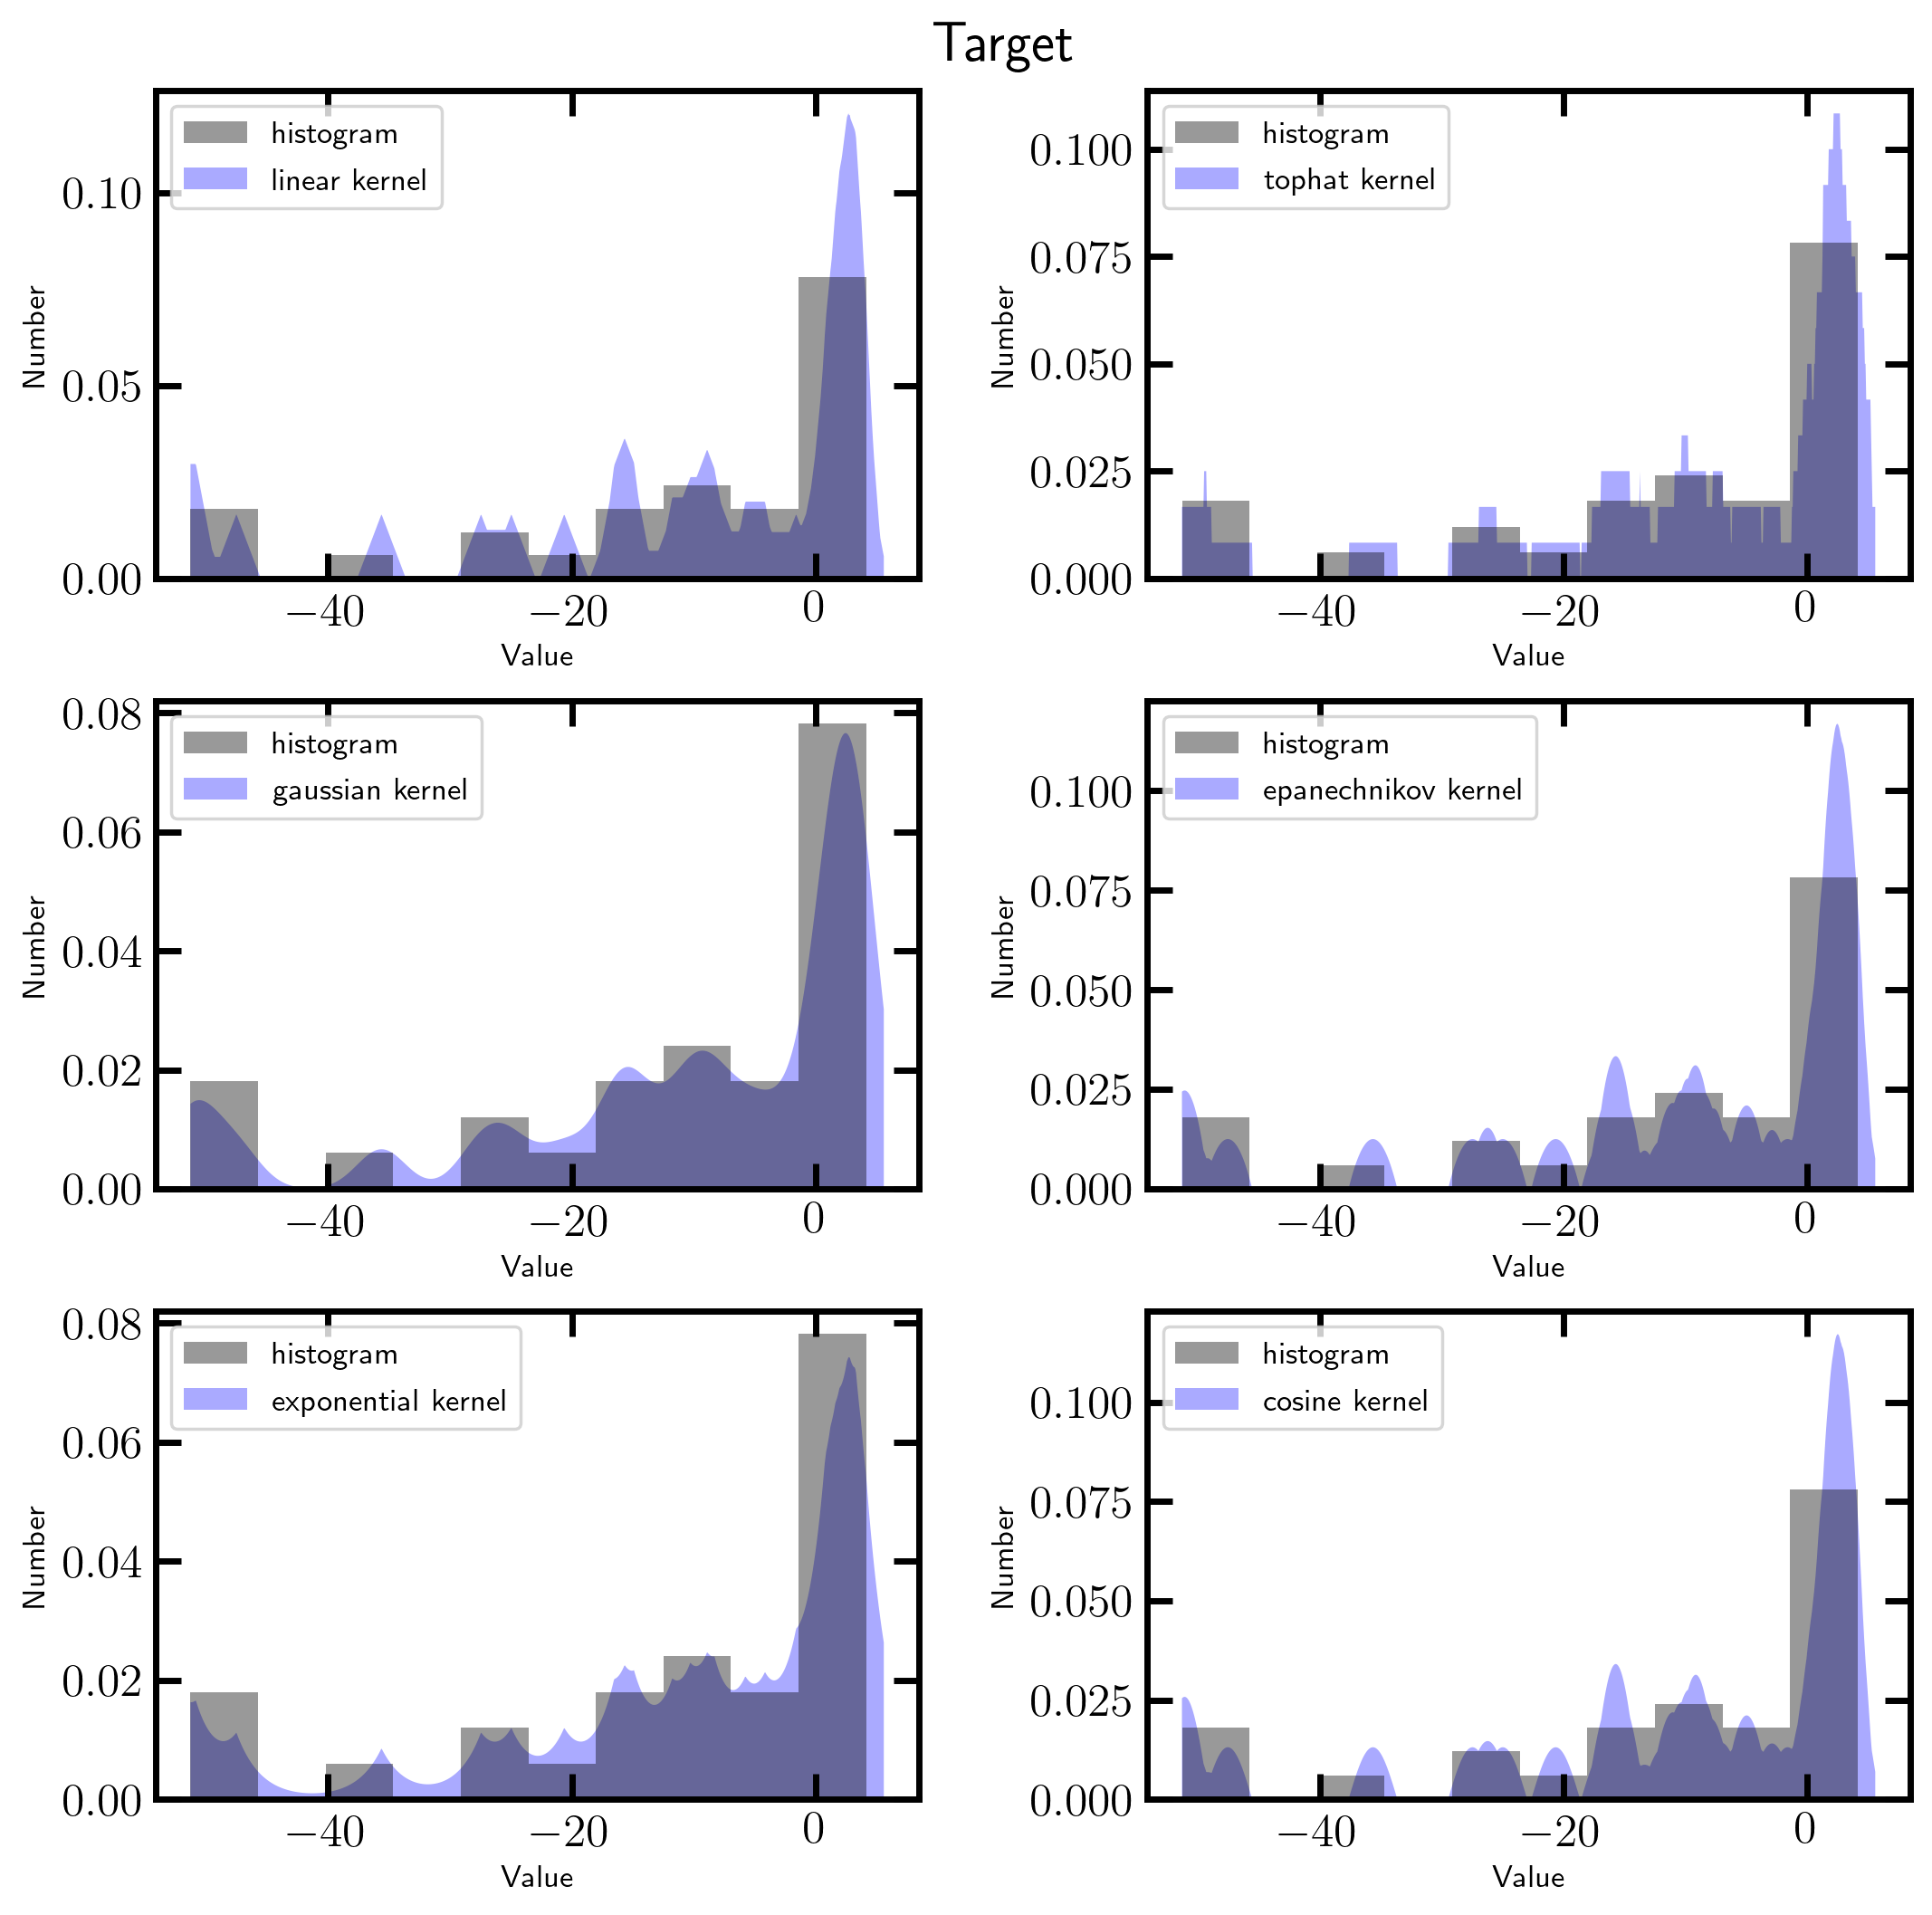

In [16]:
# Plot: We'll do the Target first
fig, axs = plt.subplots(3,2, facecolor='w', edgecolor='k', dpi = 250,figsize = [10,10])
fig.suptitle("Target", x =0.5, y = 0.91)
fig.subplots_adjust(hspace = 0.25, wspace=.3)

axs = axs.ravel()


# List of kernels
kernels = ["linear","tophat","gaussian","epanechnikov", "exponential", "cosine"]

for i in range(0,len(kernels)):
    PDF = kde_sklearn(e1_target,bandwidth=2,kernel= kernels[i])
    
    axs[i].hist(e1_target,bins = 10, histtype = 'stepfilled', color = 'black', alpha = 0.4, label = 'histogram', density = True)
    axs[i].fill_between(xplot, PDF, fc='#AAAAFF', label = kernels[i] + " kernel")
    axs[i].legend(loc = 'upper left', fontsize = 10)
    axs[i].set_ylabel('Number', fontsize = 10)
    axs[i].set_xlabel('Value', fontsize = 10)



    

#plt.savefig('out.png')

And the comparison sample:

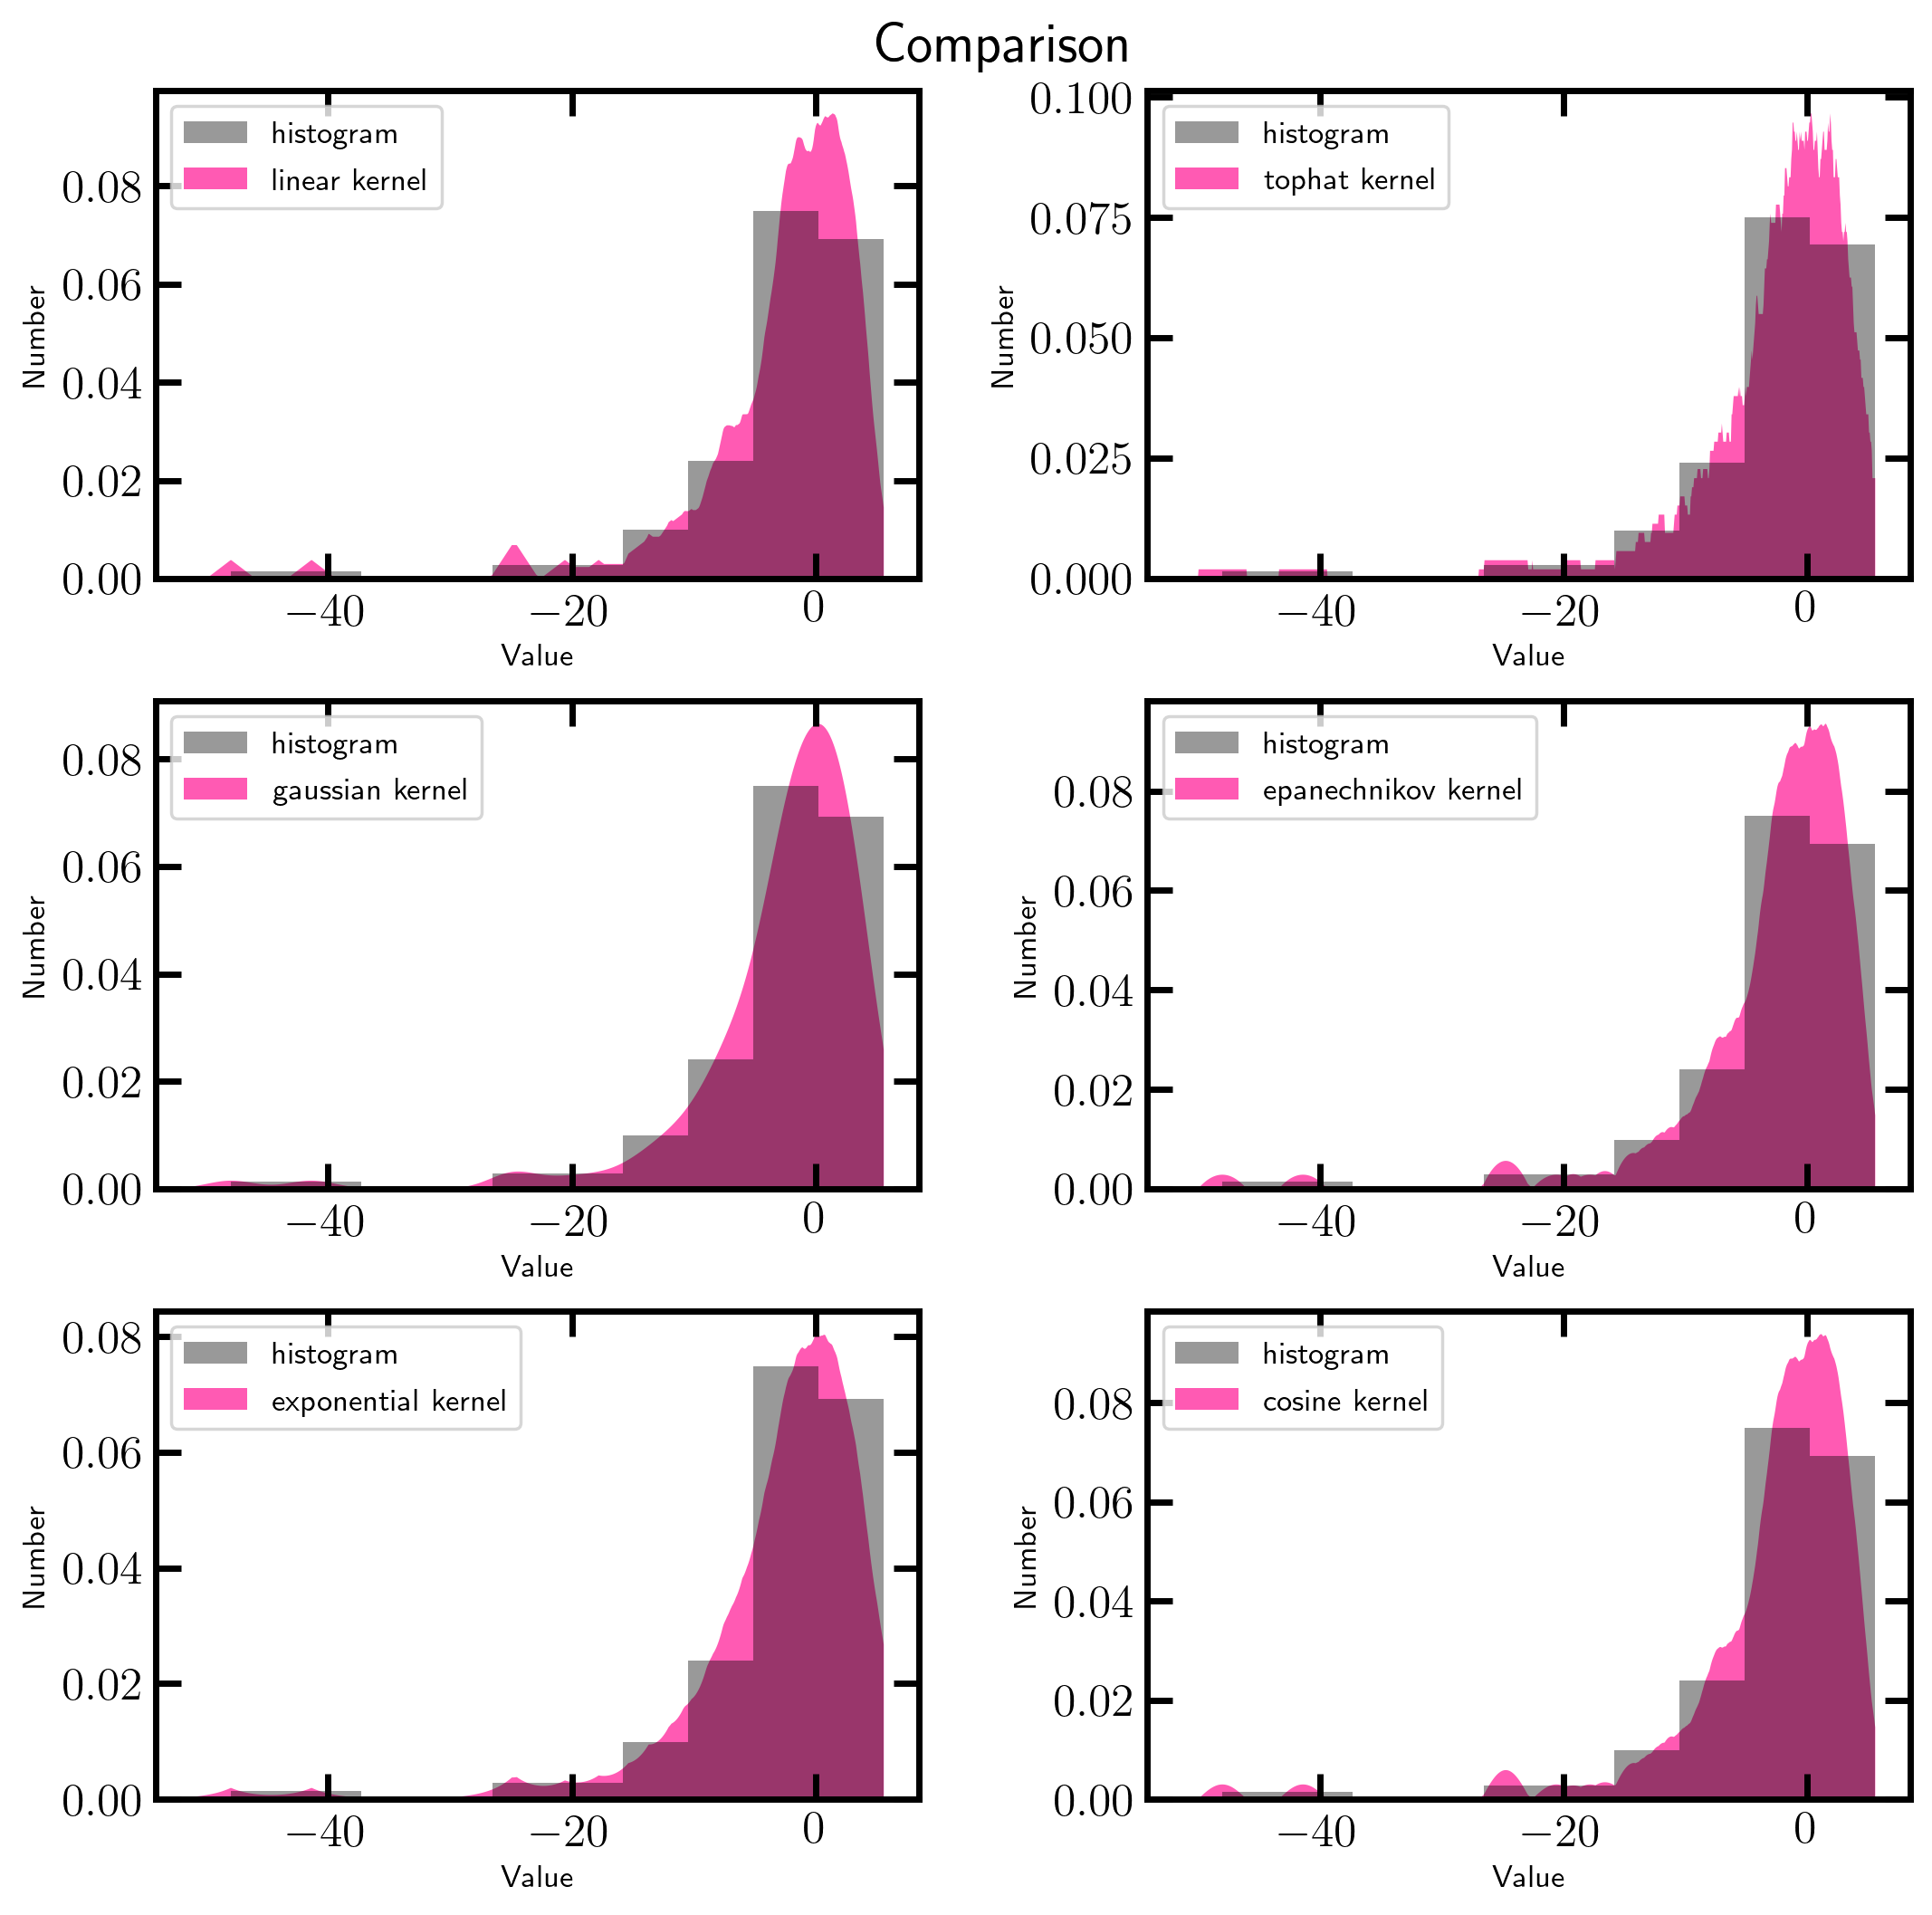

In [17]:
# Comparison
fig, axs = plt.subplots(3,2, facecolor='w', edgecolor='k', dpi = 250,figsize = [10,10])
fig.suptitle("Comparison", x =0.5, y = 0.91)
fig.subplots_adjust(hspace = 0.25, wspace=.3)

axs = axs.ravel()


# List of kernels
kernels = ["linear","tophat","gaussian","epanechnikov", "exponential", "cosine"]

for i in range(0,len(kernels)):
    PDF = kde_sklearn(e1_comparison,bandwidth=2,kernel= kernels[i])
    
    axs[i].hist(e1_comparison,bins = 10, histtype = 'stepfilled', color = 'black', alpha = 0.4, label = 'histogram', density = True)
    axs[i].fill_between(xplot, PDF, fc='deeppink', alpha = 0.7, label = kernels[i] + " kernel")
    axs[i].legend(loc = 'upper left', fontsize = 10)
    axs[i].set_ylabel('Number', fontsize = 10)
    axs[i].set_xlabel('Value', fontsize = 10)

Changing the kernel to 2 from the original value of 1 in the first submission appears to have erased any bimodality in the target sample. If we squint, we can make out some possible bimodality in the linear, cosine, and epanechnikov kernels for the comparison sample.

We'll plot two of these side-by-side and zoom into the peak so we can more readily compare them:

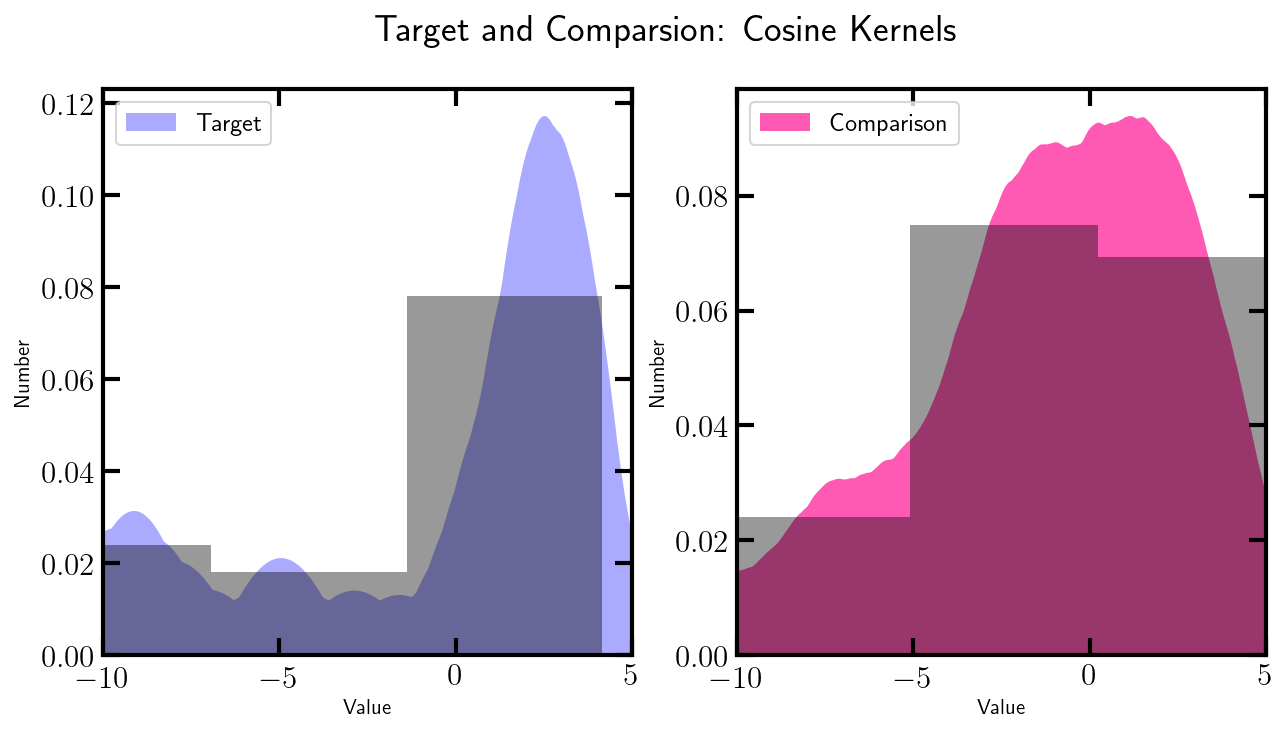

In [18]:
plt.figure(figsize = [10,5], dpi = 150)
plt.suptitle('Target and Comparsion: Cosine Kernels')


plt.subplot(121)
PDF_1 = kde_sklearn(e1_target,bandwidth=2,kernel= 'cosine')
plt.hist(e1_target,bins = 10, histtype = 'stepfilled', color = 'black', alpha = 0.4, density = True)
plt.fill_between(xplot, PDF_1, fc='#AAAAFF', label = 'Target')
plt.ylabel('Number', fontsize = 10)
plt.xlabel('Value', fontsize = 10)
plt.xlim(-10,5)
plt.legend(loc = 'upper left', fontsize = 12)

plt.subplot(122)
PDF_2 = kde_sklearn(e1_comparison,bandwidth=2,kernel= 'cosine')
plt.hist(e1_comparison,bins = 10, histtype = 'stepfilled', color = 'black', alpha = 0.4, density = True)
plt.fill_between(xplot, PDF_2, fc = 'deeppink', alpha = 0.7, label = 'Comparison')
plt.ylabel('Number', fontsize = 10)
plt.xlabel('Value', fontsize = 10)
plt.xlim(-10,5)
plt.legend(loc = 'upper left', fontsize = 12)



No clear shareed bimodality is evident for the two samples. It is unlikely they are drawn from the same parent distribution. 